## This Notebook tells about whether a loan is approved or not

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.size

7982

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Treating with Null values
#### Using fillna and interpolate we're going to perform cleaning on this data

In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
df.fillna(method='ffill',inplace=True)

In [8]:
df.fillna(method='bfill',inplace=True)

In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


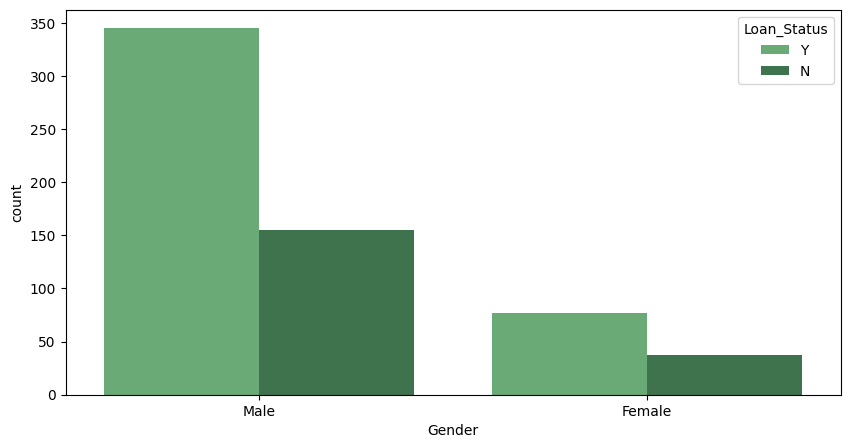

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

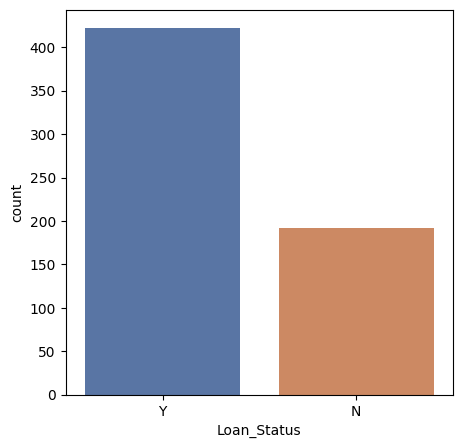

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=df,palette='deep')
plt.show()

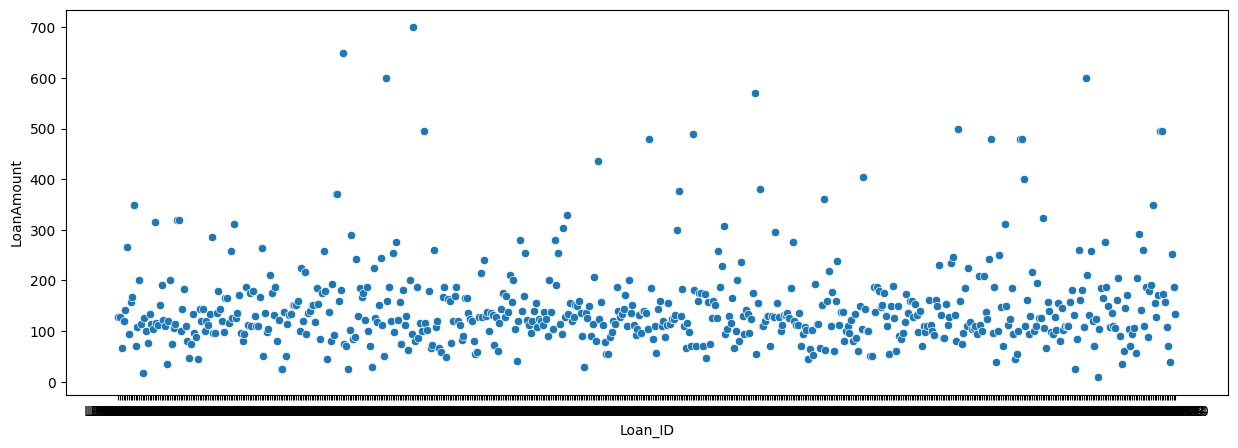

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

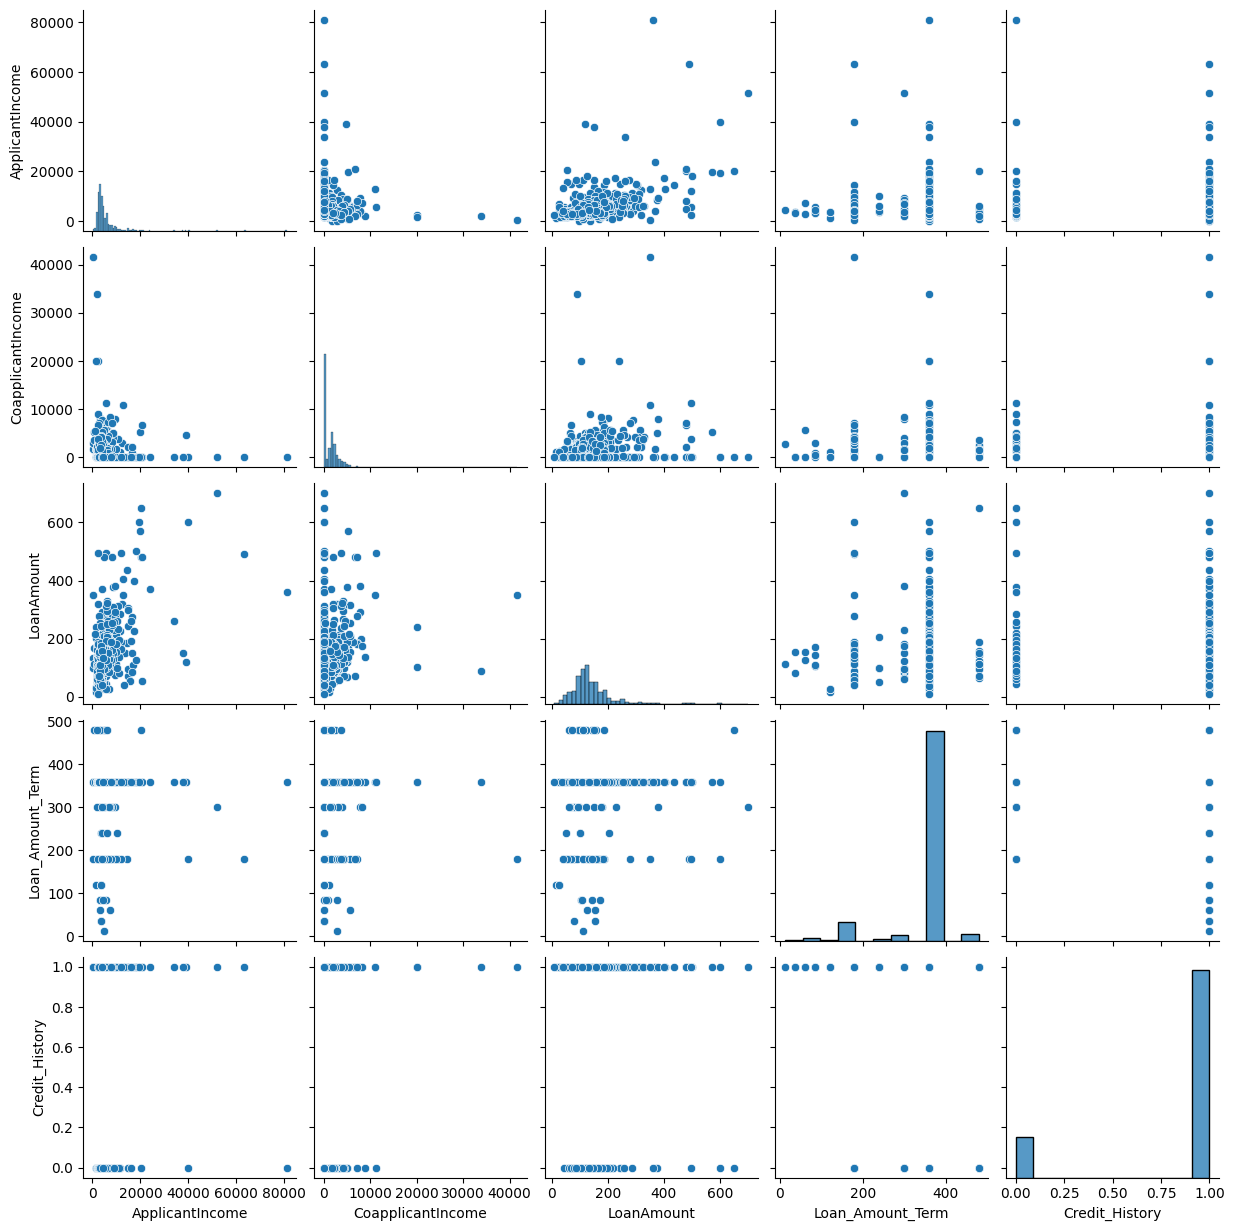

In [13]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

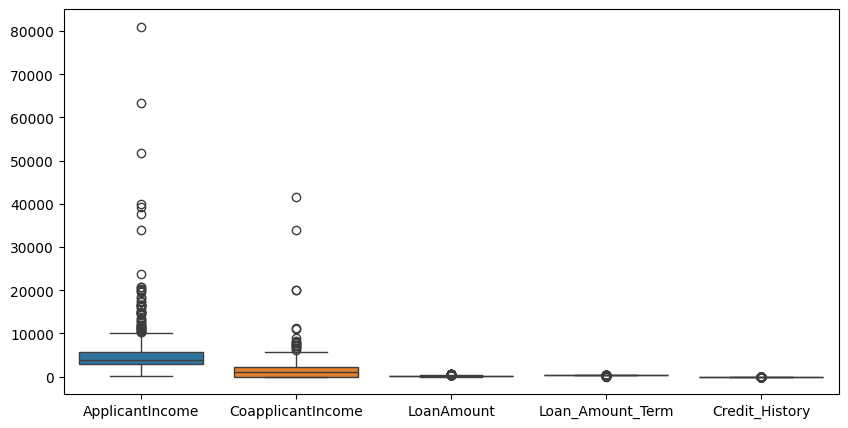

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

### Removing unwanted columns in the dataset

In [15]:
df.drop('Dependents',axis=1,inplace=True)
df.drop('ApplicantIncome',axis=1,inplace=True)
df.drop('CoapplicantIncome',axis=1,inplace=True)
df.drop('LoanAmount',axis=1,inplace=True)
df.drop('Loan_Amount_Term',axis=1,inplace=True)
df.drop('Credit_History',axis=1,inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


### Encoding using get_dummies OneHotEncoder

In [17]:
df1=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,False,True,True,False,True,False,True,False,False,False,True,False,True
1,LP001003,False,True,False,True,True,False,True,False,True,False,False,True,False
2,LP001005,False,True,False,True,True,False,False,True,False,False,True,False,True
3,LP001006,False,True,False,True,False,True,True,False,False,False,True,False,True
4,LP001008,False,True,True,False,True,False,True,False,False,False,True,False,True


In [18]:
df1.drop('Gender_Female',axis=1,inplace=True)
df1.drop('Married_No',axis=1,inplace=True)
df1.drop('Education_Graduate',axis=1,inplace=True)
df1.drop('Self_Employed_No',axis=1,inplace=True)
df1.drop('Property_Area_Rural',axis=1,inplace=True)
df1.drop('Loan_Status_N',axis=1,inplace=True)

In [19]:
df1.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,True,False,False,False,False,True,True
1,LP001003,True,True,False,False,False,False,False
2,LP001005,True,True,False,True,False,True,True
3,LP001006,True,True,True,False,False,True,True
4,LP001008,True,False,False,False,False,True,True


### Splitting our data into training and testing

In [20]:
X = df1[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y=df1["Loan_Status_Y"].values

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(xtrain,ytrain)
yp1=m1.predict(xtest)


from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
yp2=m2.predict(xtest)

### Accuracy of two models ( LogisticRegression and DecisionTree )
#### Finfing the best model..........

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp1))
print(" confusion matrix is ",confusion_matrix(ytest,yp1))

Logistic Regression :
 accuracy is  0.7154471544715447
 precision score is  0.7310924369747899
 recall is  0.9666666666666667
 f1 score is  0.8325358851674641
                                                                                                              
 classification report is                precision    recall  f1-score   support

       False       0.25      0.03      0.05        33
        True       0.73      0.97      0.83        90

    accuracy                           0.72       123
   macro avg       0.49      0.50      0.44       123
weighted avg       0.60      0.72      0.62       123

 confusion matrix is  [[ 1 32]
 [ 3 87]]


In [23]:
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp2))
print(" confusion matrix is ",confusion_matrix(ytest,yp2))

Decision Tree Classifier :
 accuracy is  0.7317073170731707
 precision score is  0.7522123893805309
 recall is  0.9444444444444444
 f1 score is  0.8374384236453202
                                                                                                              
 classification report is                precision    recall  f1-score   support

       False       0.50      0.15      0.23        33
        True       0.75      0.94      0.84        90

    accuracy                           0.73       123
   macro avg       0.63      0.55      0.53       123
weighted avg       0.68      0.73      0.68       123

 confusion matrix is  [[ 5 28]
 [ 5 85]]


In [24]:
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("***********************************************************************************************************")
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))

Logistic Regression :
 accuracy is  0.7154471544715447
 precision score is  0.7310924369747899
 recall is  0.9666666666666667
 f1 score is  0.8325358851674641
***********************************************************************************************************
Decision Tree Classifier :
 accuracy is  0.7317073170731707
 precision score is  0.7522123893805309
 recall is  0.9444444444444444
 f1 score is  0.8374384236453202


In [25]:
print("Logistic Regression Predictions ",yp1)
print("*****************************************************************************************************************")
print("Decision Tree predictions ",yp2)

Logistic Regression Predictions  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
*****************************************************************************************************************
Decision Tree predictions  [ True  True  True  True  True False  True  True  True  True  True  True
  T

#### Final accuracies of two models are :

In [26]:
print("For Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print("For Decision tree :")
print(" accuracy is ",accuracy_score(ytest,yp2))

For Logistic Regression :
 accuracy is  0.7154471544715447
For Decision tree :
 accuracy is  0.7317073170731707


### Hence Decision Tree performs with more accuracy than LogisticRegression